In [2]:
import cv2;
import numpy as np;
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import math

import sys

print("Python version %s / OpenCV version %s " %(sys.version,cv2.__version__))

Python version 3.11.8 (main, Feb 12 2024, 14:50:05) [GCC 13.2.1 20230801] / OpenCV version 4.9.0 


In [12]:
drive_path = ".."

#### Ejercicio 1: Transformaciones lineales de una imagen
Conociendo la ecuación general de una transformación lineal:
\begin{equation*}
    s = ar+c
\end{equation*}
con $r$: valor de entrada, $a$: factor de ganancia y $c$: offset, realice los siguientes ejercicios:
1. Implemente una LUT (Look-Up Table) del mapeo de entrada y salida.
2. Pruebe la rutina con diferentes juegos de coeficientes $a$ y $c$, sobre diversas imágenes, y muestre en una misma ventana la imagen original, el mapeo aplicado y la imagen obtenida.
3. Implemente el negativo de la imagen de entrada.
4. Genere diversas LUT con estiramientos y compresiones lineales por tramos de la entrada, y pruebe los resultados sobre diversas imágenes.
5. *(Opcional)*: genere una imagen binaria de 256x256 que simule los ejes cartesianos de la transformacion $r-s$, marcando la línea identidad. Capture dos puntos que marquen el final de los segmentos, y genere la LUT con una transformación que parta del origen, pase por los puntos marcados, y finalice en el punto (256x256). Pruebe la rutina con diversas imágenes.


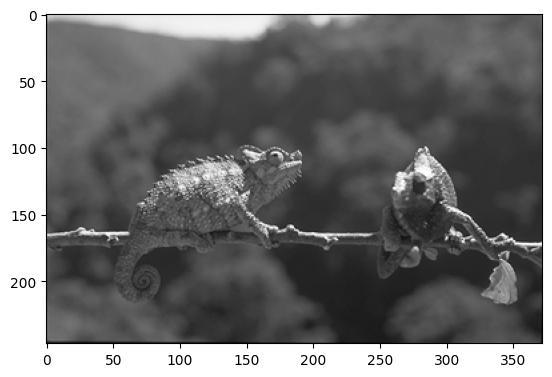

Alto, ancho y n_canales = (247, 372, 3)


In [13]:
def mostrar_imagen(img_path,):
  img = cv2.imread(drive_path+img_path)
  plt.figure()
  plt.imshow(img)
  plt.show()
  print("Alto, ancho y n_canales = %s" %str(img.shape))

img_list = ["/images/billete.jpg",
            "/images/blister_completo.jpg",
            "/images/blister_incompleto.jpg",
            "/images/bone.tif",
            "/images/botellas.tif",
            "/images/building.jpg",
            "/images/camaleon.tif",
            ]

img = img_list[6]
mostrar_imagen(img)


array([[183,  32,  37, ..., 158, 160, 147],
       [179,  36,  42, ..., 159, 159, 146],
       [178,  42,  52, ..., 160, 159, 149],
       ...,
       [183, 136, 142, ..., 193, 191, 218],
       [201, 171, 171, ..., 189, 187, 224],
       [231, 225, 225, ..., 181, 186, 232]], dtype=int16)

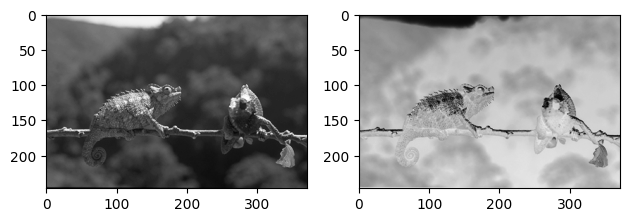

In [65]:
a = -1
c = 255

img = cv2.imread(drive_path+img_list[6],cv2.IMREAD_GRAYSCALE)

def lineal_transformation(img,a,c,show=False):
    img_transformed = a*img + c*np.ones(img.shape).astype(np.uint8)

    if show:
        fig = plt.figure(tight_layout=True)
        gs = gridspec.GridSpec(1,2)

        ax = fig.add_subplot(gs[0,0])
        ax.imshow(img,cmap='gray')

        ax = fig.add_subplot(gs[0,1])
        ax.imshow(img_transformed,cmap='gray',vmin=0,vmax=255)

    return img_transformed

lineal_transformation(img,a,r,show=True)

#### Ejercicio 2: Información de intensidad
1. Informar los valores de intensidad de puntos particulares de la imagen.
2. Obtener y graficar los valores de intensidad (*perfil de intensidad*) sobre una determinada fila o columna.
3. Graficar el *perfil de intensidad* para un segmento de interés cualquiera.



#### Ejercicio 3: Aplicación